In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def vector(p1, p2):
    return [p2[0]-p1[0], p2[1]-p1[1], p2[2]-p1[2]]

def vabs(a):
    from math import sqrt
    return sqrt(pow(a[0],2)+pow(a[1],2)+pow(a[2],2))

def calc_dis(p1, p2):
    v = vector(p1, p2)
    return vabs(v)


In [150]:
def calc_pair_sep(pdbID, chainID):
    from Bio.PDB.PDBParser import PDBParser
    import warnings
    from Bio.PDB.PDBExceptions import PDBConstructionWarning
    warnings.simplefilter('ignore', PDBConstructionWarning)

    p = PDBParser(PERMISSIVE=1)
    filename = directory + 'go_rnative/' + pdbID + ".pdb"

    s = p.get_structure(pdbID, filename)
    chains = s[0].get_list()
    all_res = []


    count=0
    for chain in chains:
        if chain.get_id() == chainID.upper():
            for resid in chain:
                is_regular_res = resid.has_id('CA') and resid.has_id('O')
                res_id = resid.get_id()[0]
                if (res_id==' ' or res_id=='H_MSE' or res_id=='H_M3L' or res_id=='H_CAS') and is_regular_res:
                    all_res.append(resid)

    number_of_pdb_amino_acids = len(all_res)

    #number_of_pdb_amino_acids = len(all_res)
    #native_distances = numpy.zeros((number_of_pdb_amino_acids, number_of_pdb_amino_acids))

    contacts = np.zeros([number_of_pdb_amino_acids, number_of_pdb_amino_acids])
    #for i in range(len(all_res)):
    #    ires = all_res[i]
    #    xyz_CAi = ires['CA'].get_coord()
    #    for j in range(i+2, len(all_res)):
    #        jres = all_res[j]
    #        xyz_CAj = jres['CA'].get_coord()
    #        r = calc_dis(xyz_CAi, xyz_CAj)
    #        #native_distances[i,j]=r
    #        if r<9.5:
    #            COM_coords.append((xyz_CAi+xyz_CAj)/2.0)

    for i in range(len(all_res)):
        ires = all_res[i]
        #if ires.has_id('CB'):
        #    xyz_CAi = ires['CB'].get_coord()
        #else:
        xyz_CAi = ires['CA'].get_coord()
        for j in range(i+3, len(all_res)):
            jres = all_res[j]
            #if jres.has_id('CB'):
            #    xyz_CAj = jres['CB'].get_coord()
            #else:
            xyz_CAj = jres['CA'].get_coord()
            r = calc_dis(xyz_CAi, xyz_CAj)
            #native_distances[i,j]=r
            if r<cutoff:
                #dist_list.append([i,j,r])
            #if calc_min_distance(ires,jres)<4.5:
#                iresname = ires.get_resname()
#                jresname = jres.get_resname()
#                if (iresname<=jresname):
                    #pairs.append([iresname, jresname, r])
                contacts[i][j]=1
#                else:
                    #pairs.append([jresname, iresname, r])
                contacts[j][i]=1

    #pairs = np.asarray(pairs)
    return contacts#pairs

In [148]:
def calc_pair_sep(pdbID, chainID):
    from Bio.PDB.PDBParser import PDBParser
    import warnings
    from Bio.PDB.PDBExceptions import PDBConstructionWarning
    warnings.simplefilter('ignore', PDBConstructionWarning)

    p = PDBParser(PERMISSIVE=1)
    filename = directory + pdbID + ".pdb"

    s = p.get_structure(pdbID, filename)
    chains = s[0].get_list()
    all_res = []


    count=0
    for chain in chains:
        if chain.get_id() == chainID.upper():
            for resid in chain:
                is_regular_res = resid.has_id('CA') and resid.has_id('O')
                res_id = resid.get_id()[0]
                if (res_id==' ' or res_id=='H_MSE' or res_id=='H_M3L' or res_id=='H_CAS') and is_regular_res:
                    all_res.append(resid)

    number_of_pdb_amino_acids = len(all_res)

    #number_of_pdb_amino_acids = len(all_res)
    #native_distances = numpy.zeros((number_of_pdb_amino_acids, number_of_pdb_amino_acids))

    contacts = np.zeros([number_of_pdb_amino_acids, number_of_pdb_amino_acids])
    #for i in range(len(all_res)):
    #    ires = all_res[i]
    #    xyz_CAi = ires['CA'].get_coord()
    #    for j in range(i+2, len(all_res)):
    #        jres = all_res[j]
    #        xyz_CAj = jres['CA'].get_coord()
    #        r = calc_dis(xyz_CAi, xyz_CAj)
    #        #native_distances[i,j]=r
    #        if r<9.5:
    #            COM_coords.append((xyz_CAi+xyz_CAj)/2.0)
    dist_list = []
    for i in range(len(all_res)):
        ires = all_res[i]
        #if ires.has_id('CB'):
        #    xyz_CAi = ires['CB'].get_coord()
        #else:
        xyz_CAi = ires['CA'].get_coord()
        for j in range(i+3, len(all_res)):
            jres = all_res[j]
            #if jres.has_id('CB'):
            #    xyz_CAj = jres['CB'].get_coord()
            #else:
            xyz_CAj = jres['CA'].get_coord()
            r = calc_dis(xyz_CAi, xyz_CAj)
            #native_distances[i,j]=r
            if r<cutoff:
                dist_list.append([i,j,r])
            #if calc_min_distance(ires,jres)<4.5:
#                iresname = ires.get_resname()
#                jresname = jres.get_resname()
#                if (iresname<=jresname):
                    #pairs.append([iresname, jresname, r])
                contacts[i][j]=1
#                else:
                    #pairs.append([jresname, iresname, r])
                contacts[j][i]=1

    #pairs = np.asarray(pairs)
    return contacts, dist_list#pairs

In [102]:
pdbID='1mba'
chainID='A'
cons, dists = calc_pair_sep(pdbID, chainID)

In [103]:
dists

[[0, 3, 9.22948243466755],
 [0, 5, 9.433824727539855],
 [0, 6, 8.793474574953986],
 [0, 76, 8.854134877395323],
 [0, 77, 5.788404968613135],
 [0, 78, 5.4571216657428],
 [0, 79, 6.305541749939126],
 [0, 80, 4.892549454882584],
 [0, 81, 8.483249897950376],
 [0, 82, 9.210678987298879],
 [0, 83, 6.665746969464609],
 [0, 84, 8.541021577659356],
 [0, 131, 8.424064792946517],
 [0, 132, 7.427520463719227],
 [0, 135, 7.345222216224327],
 [1, 4, 7.903913974817296],
 [1, 5, 5.76690482740466],
 [1, 6, 5.805716921775093],
 [1, 7, 9.420689327331925],
 [1, 76, 9.223371902807102],
 [1, 77, 5.712730829269357],
 [1, 78, 4.852229768043096],
 [1, 79, 7.617212527188885],
 [1, 80, 7.820428228313389],
 [1, 83, 9.449557090142445],
 [1, 128, 7.4648235283943585],
 [1, 131, 7.3102417191906435],
 [1, 132, 7.032087490016262],
 [1, 135, 9.094635078066368],
 [2, 5, 5.0674839539737],
 [2, 6, 5.932310187370508],
 [2, 7, 8.494728384251548],
 [2, 77, 7.937834284753325],
 [2, 78, 5.350440083640149],
 [2, 79, 8.2967414998

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


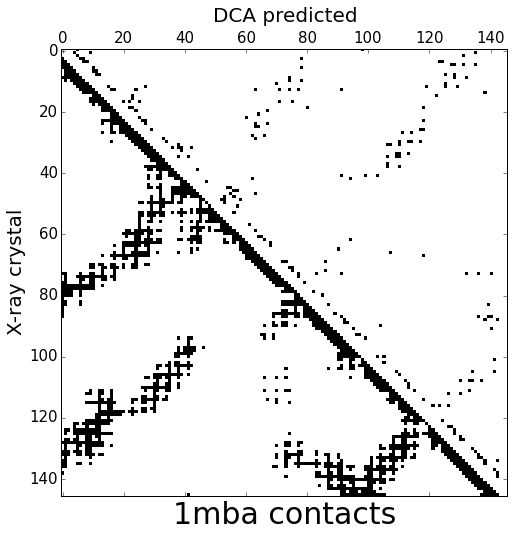

In [32]:
pdbID='1mba'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

#get dca contacts
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
dca_contacts=np.zeros([n,n])#*99
for pair in gremlin_data:
    i=int(pair[0])
    j=int(pair[1])
    irestype=pair[2][-1:]
    jrestype=pair[3][-1:]
    if float(pair[column]) > filter_threshold:
        well_center = 1
        
        dca_contacts[i-1, j-1] = well_center
        dca_contacts[j-1, i-1] = well_center
        
#get xray contacts
#download_pdb(pdbID)
xray_contacts=calc_pair_sep(pdbID, chainID)

combined_contact_map=np.tril(xray_contacts)+np.triu(dca_contacts)

plt.figure(figsize=(20,20))
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)
plt.matshow(combined_contact_map, cmap='gray_r')
plt.title("DCA predicted", fontsize=20)
plt.ylabel("X-ray crystal", fontsize=20)
plt.xlabel(pdbID + " contacts", fontsize = 30)
plt.rcParams.update({'font.size': 15})
plt.savefig(directory + pdbID + "-contacts.png")
plt.savefig(directory + pdbID + "-contacts.pdf")

In [26]:
directory='/Users/bsir/Google Drive/work/dca-go/'

In [87]:
filter_threshold=0.0
column=6
name=''#'p50'

In [88]:
pdbID='1mba'
f = open(directory+'go_rnative/'+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

In [17]:
target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
for pair in gremlin_data:
    i=int(pair[0])
    j=int(pair[1])
    #if float(pair[column]) > filter_threshold:
    if abs(i-j) > 5:
        #print i, j
        target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i+1))
        target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j+1))
        target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
        atomselect = atomselect + 1
        target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
        atomselect = atomselect + 1
        target.write("draw color green\n")
        target.write("draw line $pos1 $pos2 style solid width 1\n")
target.write("mol modselect 0 top \"all\"\n")
target.write("mol modstyle 0 top newcartoon\n")
target.write("mol modcolor 0 top colorid 15\n")
target.close()

In [110]:
pdbID='1mba'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [108]:
pdbID='2eb8'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [111]:
pdbID='1r69'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [112]:
pdbID='4cpv'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [113]:
pdbID='1n2x'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [114]:
pdbID='3ICB_AWSEM'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin.3icb.dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

IOError: [Errno 2] No such file or directory: '/Users/bsir/Google Drive/work/dca-go/go_rnative/3ICB_AWSEM.seq'

In [115]:
pdbID='1ljp'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+name+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [116]:
pdbID='2z15'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+name+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [118]:
pdbID='2ea9'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [119]:
pdbID='1xg8'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+name+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [120]:
pdbID='1fu1'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [121]:
pdbID='T0766'
chainID=' '

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [122]:
pdbID='256b'
chainID='A'

f = open(directory+"go_rnative/"+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()

xray_contacts=calc_pair_sep(pdbID, chainID)

seq_equal = False
if n == xray_contacts.shape[0]:
    seq_equal = True

target = open(pdbID+"_dca_contacts.tcl", 'w')
atomselect=0
gremlin_data=np.loadtxt("./gremlin_dat/gremlin.256B.dat", dtype=str, skiprows=1)
if seq_equal:
    for pair in gremlin_data:
        i=int(pair[0])
        j=int(pair[1])
        #if float(pair[column]) > filter_threshold:
        if abs(i-j) > 5:
            #print i, j
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
            target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
            target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
            atomselect = atomselect + 1
            target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
            atomselect = atomselect + 1
            if xray_contacts[i-1,j-1]==1:
                target.write("draw color green\n")
            else:
                target.write("draw color red\n")
            target.write("draw line $pos1 $pos2 style solid width 1\n")
    target.write("mol modselect 0 top \"all\"\n")
    target.write("mol modstyle 0 top newcartoon\n")
    target.write("mol modcolor 0 top colorid 15\n")
    target.close
else:
    print "sequences not equal"

In [153]:
def gen_dca_contact_tcl(pdbID):
    chainID='A'
    if pdbID=='T0766':
        chainID=' '
    f = open(directory+"go_rnative/"+pdbID+".seq","r")
    n=len(f.readlines()[0].strip())
    f.close()

    xray_contacts=calc_pair_sep(pdbID, chainID)

    seq_equal = False
    if n == xray_contacts.shape[0]:
        seq_equal = True
    
    new_xray_contacts = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if sum(xray_contacts[max(0,i-tolerance):min(n, i+tolerance+1),max(0,j-tolerance):min(n, j+tolerance+1)] == 1)>0:
                new_xray_contacts[i,j]=1
                
    target = open(pdbID+name+"_dca_contacts.tcl", 'w')
    atomselect=0
    gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
    if seq_equal:
        for pair in gremlin_data:
            i=int(pair[0])
            j=int(pair[1])
            if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #if abs(i-j) > 5:
                #print i, j
                target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
                target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
                target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
                atomselect = atomselect + 1
                target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
                atomselect = atomselect + 1
                if new_xray_contacts[i-1,j-1]==1:
                    target.write("draw color green\n")
                else:
                    target.write("draw color red\n")
                target.write("draw line $pos1 $pos2 style solid width 1\n")
        target.write("mol modselect 0 top \"all\"\n")
        target.write("mol modstyle 0 top newcartoon\n")
        target.write("mol modcolor 0 top colorid 15\n")
        target.close
    else:
        print "sequences not equal"

In [146]:
def gen_dca_contact_tcl_correct_cons_only(pdbID):
    chainID='A'
    if pdbID=='T0766':
        chainID=' '
    f = open(directory+"go_rnative/"+pdbID+".seq","r")
    n=len(f.readlines()[0].strip())
    f.close()

    xray_contacts=calc_pair_sep(pdbID, chainID)

    seq_equal = False
    if n == xray_contacts.shape[0]:
        seq_equal = True
        
    new_xray_contacts = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if sum(xray_contacts[max(0,i-tolerance):min(n, i+tolerance+1),max(0,j-tolerance):min(n, j+tolerance+1)] == 1)>0:
                new_xray_contacts[i,j]=1

    target = open(pdbID+name+"_dca_contacts_correct_only.tcl", 'w')
    atomselect=0
    gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
    if seq_equal:
        for pair in gremlin_data:
            i=int(pair[0])
            j=int(pair[1])
            if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #if abs(i-j) > 5:
                #print i, j
                if new_xray_contacts[i-1,j-1]==1:
                    #target.write("draw color green\n")
                    target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
                    target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
                    target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
                    atomselect = atomselect + 1
                    target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
                    atomselect = atomselect + 1
                    target.write("draw color green\n")
                    target.write("draw line $pos1 $pos2 style solid width 1\n")
        target.write("mol modselect 0 top \"all\"\n")
        target.write("mol modstyle 0 top newcartoon\n")
        target.write("mol modcolor 0 top colorid 15\n")
        target.close
    else:
        print "sequences not equal"

In [139]:
def gen_dca_contact_tcl_incorrect_cons_only(pdbID):
    chainID='A'
    if pdbID=='T0766':
        chainID=' '
    f = open(directory+"go_rnative/"+pdbID+".seq","r")
    n=len(f.readlines()[0].strip())
    f.close()

    xray_contacts=calc_pair_sep(pdbID, chainID)

    seq_equal = False
    if n == xray_contacts.shape[0]:
        seq_equal = True
    
    target = open(pdbID+name+"_dca_contacts_incorrect_only.tcl", 'w')
    atomselect=0
    gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
    if seq_equal:
        for pair in gremlin_data:
            i=int(pair[0])
            j=int(pair[1])
            if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #if abs(i-j) > 5:
                #print i, j
                if xray_contacts[i-1,j-1]!=1:
                    #target.write("draw color green\n")
                    target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
                    target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
                    target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
                    atomselect = atomselect + 1
                    target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
                    atomselect = atomselect + 1
                    target.write("draw color red\n")
                    target.write("draw line $pos1 $pos2 style solid width 1\n")
        target.write("mol modselect 0 top \"all\"\n")
        target.write("mol modstyle 0 top newcartoon\n")
        target.write("mol modcolor 0 top colorid 15\n")
        target.close
    else:
        print "sequences not equal"

In [154]:
def gen_dca_contact_tcl_incorrect_cons_only(pdbID):
    chainID='A'
    if pdbID=='T0766':
        chainID=' '
    f = open(directory+"go_rnative/"+pdbID+".seq","r")
    n=len(f.readlines()[0].strip())
    f.close()

    xray_contacts=calc_pair_sep(pdbID, chainID)

    seq_equal = False
    if n == xray_contacts.shape[0]:
        seq_equal = True
    
    new_xray_contacts = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if sum(xray_contacts[max(0,i-tolerance):min(n, i+tolerance+1),max(0,j-tolerance):min(n, j+tolerance+1)] == 1)>0:
                new_xray_contacts[i,j]=1

    target = open(pdbID+name+"_dca_contacts_incorrect_only.tcl", 'w')
    atomselect=0
    gremlin_data=np.loadtxt("./gremlin_dat/gremlin."+pdbID+".dat", dtype=str, skiprows=1)
    if seq_equal:
        for pair in gremlin_data:
            i=int(pair[0])
            j=int(pair[1])
            if (float(pair[column]) > filter_threshold) and (abs(i-j) > 5):
            #if abs(i-j) > 5:
                #print i, j
                if new_xray_contacts[i-1,j-1]!=1:
                    #target.write("draw color green\n")
                    target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (i, i))
                    target.write("set sel%d [atomselect top \"resid %d and name CA\"]\n" % (j, j))
                    target.write("lassign [atomselect%d get {x y z}] pos1\n" % atomselect)
                    atomselect = atomselect + 1
                    target.write("lassign [atomselect%d get {x y z}] pos2\n" % atomselect)
                    atomselect = atomselect + 1
                    #target.write("draw color red\n")
                    target.write("draw color orange3\n")
                    target.write("draw line $pos1 $pos2 style solid width 1\n")
        target.write("mol modselect 0 top \"all\"\n")
        target.write("mol modstyle 0 top newcartoon\n")
        target.write("mol modcolor 0 top colorid 15\n")
        target.close
    else:
        print "sequences not equal"

In [156]:
filter_threshold=0.0
column=6
name='95'#'p50'
tolerance=1
cutoff=9.5
#pdbID='1mba'
pdbIDs = ['1r69','3icb','1n2x','4cpv','1mba', '2eb8', '1ljp', '2z15', '2ea9', '1fu1', '1xg8', 'T0766', '256b']
contact_map_stats = []
for pdbID in pdbIDs:
    gen_dca_contact_tcl(pdbID)
    gen_dca_contact_tcl_correct_cons_only(pdbID)
    gen_dca_contact_tcl_incorrect_cons_only(pdbID)
